WORDCLOUD, BAR CHART FREQUENT WORD, DAN SENTIMENT ANALYSIS PLOT

Import Package yang Diperlukan

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from collections import Counter
import re
from textblob import TextBlob

Read File Textnya

In [55]:
file_path = 'story_text.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()

Buat WordCloudnya

In [56]:
wordcloud = WordCloud(background_color='white').generate(text)

Display WordCloudnya

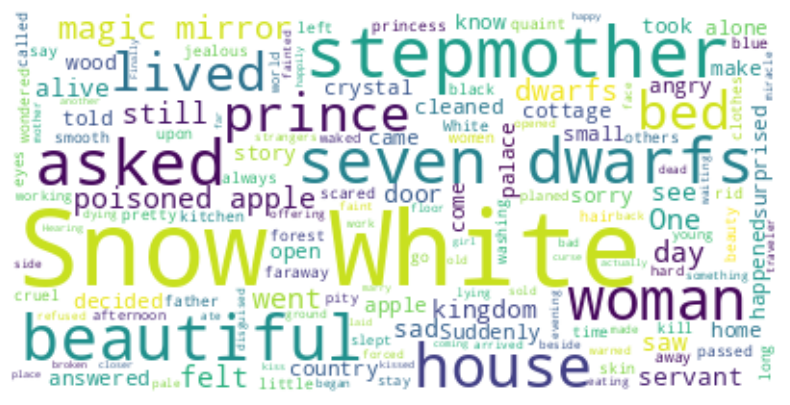

In [57]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

DISPLAY FREQUENT WORD

Preprocces Textnya  

In [58]:
words = re.findall(r'\b\w+\b', text.lower())
word_counts = Counter(words) # Hitung Frekuensi katanya
frequent_words = word_counts.most_common(20) # Ekstrak dari data word_counts

Display Datanya

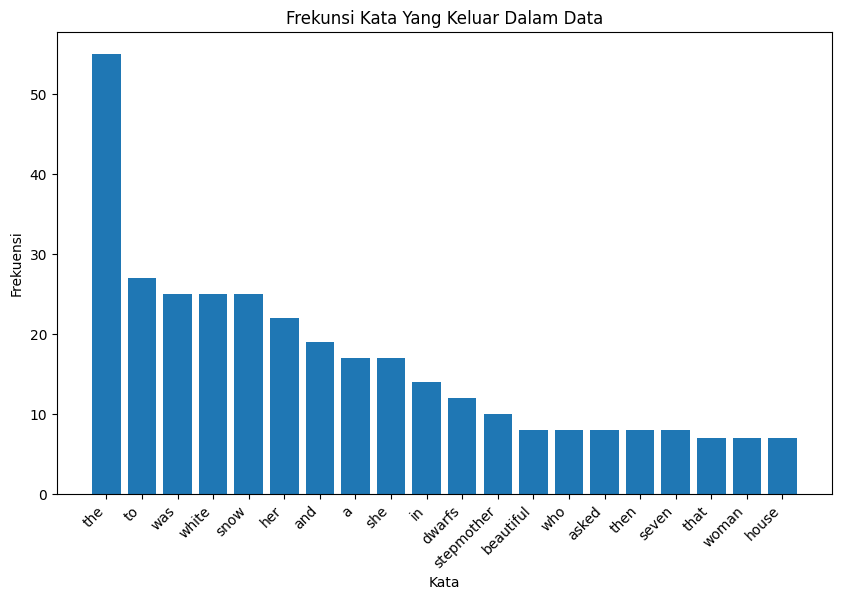

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(range(20), [count for word, count in frequent_words], tick_label=[word for word, count in frequent_words])
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Frekunsi Kata Yang Keluar Dalam Data')
plt.xticks(rotation=45, ha='right')
plt.show()

DISPLAY SENTIMENT FEEL PLOT

In [60]:
# Fungsi untuk mendapatkan sentiment polarity dalam setiap paragraf
def get_sentence_polarity(sentence):
    analysis = TextBlob(sentence)
    return analysis.sentiment.polarity

# Memecah text menjadi kalimat berdasarkan titik (.) dan menjadikan indexed list
sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)

# Mendapatkan skor setiment di setiap kalimat
sentiment_scores = [get_sentence_polarity(sentence) for sentence in sentences]

Display Datanya

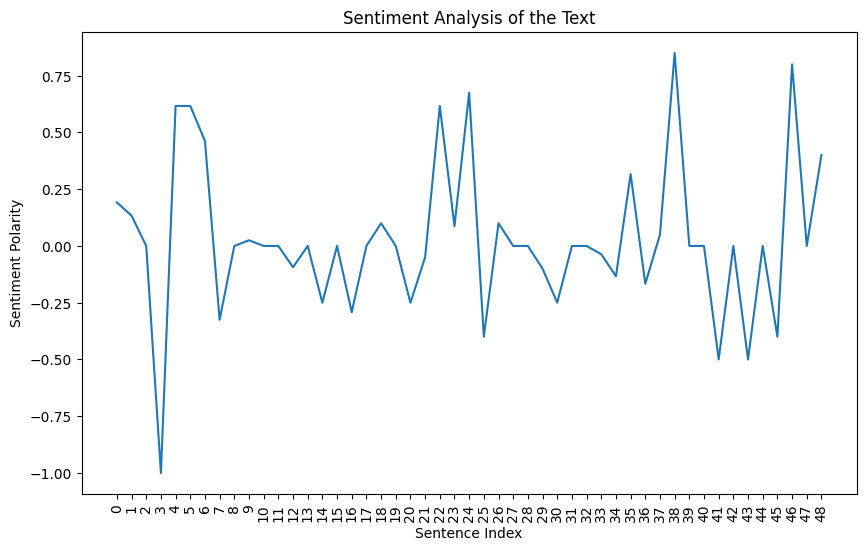

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(sentiment_scores)
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Analysis of the Text')
plt.xticks(range(len(sentences)), rotation=90)
plt.show()